# Neural Network for Prediction using TensorFlow 2.0 (Objected-Oriented)
## CPE 490 590 
### Author: Rahul Bhadani

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.size'] = 15

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard
import datetime


2024-03-04 16:01:54.371140: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-04 16:01:54.373754: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-04 16:01:54.402797: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-04 16:01:54.402820: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-04 16:01:54.404018: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

## Read the data

In [3]:
df = pd.read_csv('Dataset/Concrete_Compressive_Strength/Concrete_Data.csv')
df.shape

(1030, 9)

In [4]:
y = df[['Concrete compressive strength(MPa, megapascals) ']]
x = df.drop('Concrete compressive strength(MPa, megapascals) ', axis=1)


## Split the Dataset into Training and Testing

In [5]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size = 1/3, random_state = 0)


# Model Class for Neural Network

In [6]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class NeuralNetwork(Model):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = Dense(4, activation='relu')
        self.layer2 = Dense(2, activation='relu')
        self.layer3 = Dense(3, activation='relu')
        self.output_layer = Dense(1)

    def call(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return self.output_layer(x)

neuralnet_model = NeuralNetwork()

2024-03-04 16:01:56.947572: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


# Training

In [7]:
neuralnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")

history = neuralnet_model.fit(X_Train, Y_Train, epochs=1000, validation_data=(X_Test, Y_Test), 
                    verbose=1, callbacks=[tensorboard_callback])


Epoch 1/1000
22/22 [==============================] - 1s 8ms/step - loss: 1555.0266 - val_loss: 1544.8274
Epoch 2/1000
22/22 [==============================] - 0s 3ms/step - loss: 1533.0880 - val_loss: 1511.9611
Epoch 3/1000
22/22 [==============================] - 0s 3ms/step - loss: 1454.1069 - val_loss: 1385.5416
Epoch 4/1000
22/22 [==============================] - 0s 2ms/step - loss: 1251.0408 - val_loss: 1107.5192
Epoch 5/1000
22/22 [==============================] - 0s 2ms/step - loss: 922.3597 - val_loss: 739.1368
Epoch 6/1000
22/22 [==============================] - 0s 3ms/step - loss: 596.9347 - val_loss: 481.9496
Epoch 7/1000
22/22 [==============================] - 0s 2ms/step - loss: 459.2960 - val_loss: 415.1609
Epoch 8/1000
22/22 [==============================] - 0s 2ms/step - loss: 434.5749 - val_loss: 399.4305
Epoch 9/1000
22/22 [==============================] - 0s 3ms/step - loss: 418.4568 - val_loss: 385.2382
Epoch 10/1000
22/22 [==============================] - 0

# Plot training & validation loss values


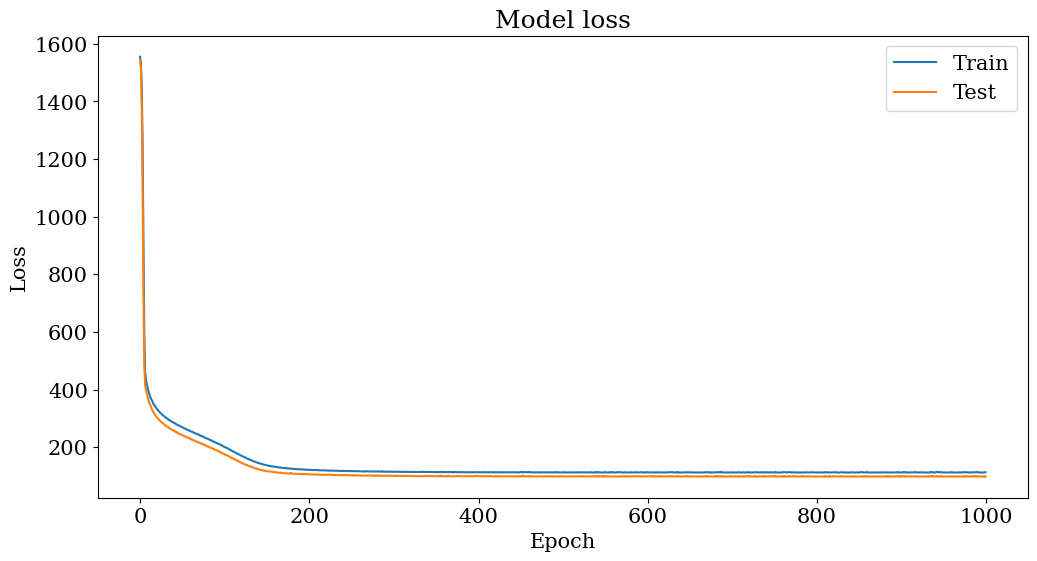

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Mean Squared Error on the Test Data

In [15]:
test_loss = neuralnet_model.evaluate(X_Test, Y_Test, verbose=1)

print(f"Mean Squared Error on Test Data: {test_loss}")

11/11 [==============================] - 0s 991us/step - loss: 98.0678
Mean Squared Error on Test Data: 98.06780242919922


# Save The Final Model Weights

In [16]:
neuralnet_model.save_weights('model_weights.h5')

# Local The Final Model Weights from Saved `.h5` File

In [11]:
# Create a new instance of the same model
new_model = NeuralNetwork()

# Call the model on some data (this could be a batch of your actual data or dummy data)
dummy_data = tf.zeros((1, 8))  # Assuming the input shape is (None, 8)
new_model(dummy_data)

# Load the previously saved weights
new_model.load_weights('model_weights.h5')

# Save the entire model to the TensorFlow SavedModel format


In [12]:
neuralnet_model.save('mymodel', save_format='tf')


INFO:tensorflow:Assets written to: mymodel/assets


INFO:tensorflow:Assets written to: mymodel/assets


# Load the entire model from the TensorFlow SavedModel format


In [13]:
loaded_model = tf.keras.models.load_model('mymodel')
